# Get figures and p-values from permutation testing.

Only doing this for the retrospective data. Track-specific files have already been generated using `stats_permute_*.py`

In [11]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as pn
from scipy.stats import distributions

indir = "/cbica/projects/csdsi/cleaned_paper_analysis/data/dice_scores/permutation_stats/"
cs_acqs = ["HA-SC92+55-1", "HA-SC92+55-2",  "HA-SC92", "HA-SC55-1",  "HA-SC55-2", "RAND57"]


In [34]:
trks = ["Arcuate_Fasciculus_L", "Arcuate_Fasciculus_R", "Cingulum_Frontal_Parahippocampal_L", "Cingulum_Frontal_Parahippocampal_R", "Cingulum_Frontal_Parietal_L", "Cingulum_Frontal_Parietal_R", "Cingulum_Parahippocampal_L", "Cingulum_Parahippocampal_Parietal_L", "Cingulum_Parahippocampal_Parietal_R", "Cingulum_Parahippocampal_R", "Cingulum_Parolfactory_L", "Cingulum_Parolfactory_R", "Corpus_Callosum_Body", "Corpus_Callosum_Forceps_Major", "Corpus_Callosum_Forceps_Minor", "Corpus_Callosum_Tapetum", "Corticospinal_Tract_L", "Corticospinal_Tract_R", "Corticostriatal_Tract_Anterior_L", "Corticostriatal_Tract_Anterior_R", "Corticostriatal_Tract_Posterior_L", "Corticostriatal_Tract_Posterior_R", "Corticostriatal_Tract_Superior_L", "Corticostriatal_Tract_Superior_R", "Fornix_L", "Fornix_R", "Frontal_Aslant_Tract_L", "Frontal_Aslant_Tract_R", "Inferior_Fronto_Occipital_Fasciculus_L", "Inferior_Fronto_Occipital_Fasciculus_R", "Inferior_Longitudinal_Fasciculus_L", "Inferior_Longitudinal_Fasciculus_R", "Middle_Longitudinal_Fasciculus_L", "Middle_Longitudinal_Fasciculus_R", "Optic_Radiation_L", "Optic_Radiation_R", "Parietal_Aslant_Tract_L", "Parietal_Aslant_Tract_R", "Reticular_Tract_L", "Reticular_Tract_R", "Superior_Longitudinal_Fasciculus1_L", "Superior_Longitudinal_Fasciculus1_R", "Superior_Longitudinal_Fasciculus2_L", "Superior_Longitudinal_Fasciculus2_R", "Superior_Longitudinal_Fasciculus3_L", "Superior_Longitudinal_Fasciculus3_R", "Thalamic_Radiation_Anterior_L", "Thalamic_Radiation_Anterior_R", "Thalamic_Radiation_Posterior_L", "Thalamic_Radiation_Posterior_R", "Thalamic_Radiation_Superior_L", "Thalamic_Radiation_Superior_R", "Uncinate_Fasciculus_L", "Uncinate_Fasciculus_R", "Vertical_Occipital_Fasciculus_L", "Vertical_Occipital_Fasciculus_R"]
trks = ["Arcuate_Fasciculus_L", "Arcuate_Fasciculus_R", "Cingulum_Frontal_Parahippocampal_L", "Cingulum_Frontal_Parahippocampal_R", "Cingulum_Frontal_Parietal_L", "Cingulum_Frontal_Parietal_R", "Cingulum_Parahippocampal_Parietal_L", "Cingulum_Parahippocampal_Parietal_R", "Cingulum_Parolfactory_L", "Cingulum_Parolfactory_R", "Frontal_Aslant_Tract_L", "Frontal_Aslant_Tract_R", "Inferior_Fronto_Occipital_Fasciculus_L", "Inferior_Fronto_Occipital_Fasciculus_R", "Inferior_Longitudinal_Fasciculus_L", "Inferior_Longitudinal_Fasciculus_R", "Middle_Longitudinal_Fasciculus_L", "Middle_Longitudinal_Fasciculus_R", "Parietal_Aslant_Tract_L", "Parietal_Aslant_Tract_R", "Superior_Longitudinal_Fasciculus1_L", "Superior_Longitudinal_Fasciculus1_R", "Superior_Longitudinal_Fasciculus2_L", "Superior_Longitudinal_Fasciculus2_R", "Superior_Longitudinal_Fasciculus3_L", "Superior_Longitudinal_Fasciculus3_R", "Uncinate_Fasciculus_L", "Uncinate_Fasciculus_R", "Corticospinal_Tract_L", "Corticospinal_Tract_R", "Corticostriatal_Tract_Anterior_L", "Corticostriatal_Tract_Anterior_R", "Corticostriatal_Tract_Posterior_L", "Corticostriatal_Tract_Posterior_R", "Corticostriatal_Tract_Superior_L", "Corticostriatal_Tract_Superior_R", "Thalamic_Radiation_Anterior_L", "Thalamic_Radiation_Anterior_R", "Thalamic_Radiation_Posterior_L", "Thalamic_Radiation_Posterior_R", "Thalamic_Radiation_Superior_L", "Thalamic_Radiation_Superior_R", "Fornix_R", "Optic_Radiation_L", "Optic_Radiation_R", "Reticular_Tract_L", "Reticular_Tract_R", "Corpus_Callosum_Forceps_Minor", "Corpus_Callosum_Body", "Corpus_Callosum_Tapetum", "Corpus_Callosum_Forceps_Major"]

len(trks)

51

In [18]:
def get_stats_df(grp, mtrk):
    os.makedirs(indir+grp+"/"+mtrk, exist_ok=True)
    if mtrk == "all_tracks":
        trks = ["Arcuate_Fasciculus_L", "Arcuate_Fasciculus_R", "Cingulum_Frontal_Parahippocampal_L"]#, "Cingulum_Frontal_Parahippocampal_R", "Cingulum_Frontal_Parietal_L", "Cingulum_Frontal_Parietal_R", "Cingulum_Parahippocampal_L", "Cingulum_Parahippocampal_Parietal_L", "Cingulum_Parahippocampal_Parietal_R", "Cingulum_Parahippocampal_R", "Cingulum_Parolfactory_L", "Cingulum_Parolfactory_R", "Corpus_Callosum_Body", "Corpus_Callosum_Forceps_Major", "Corpus_Callosum_Forceps_Minor", "Corpus_Callosum_Tapetum", "Corticospinal_Tract_L", "Corticospinal_Tract_R", "Corticostriatal_Tract_Anterior_L", "Corticostriatal_Tract_Anterior_R", "Corticostriatal_Tract_Posterior_L", "Corticostriatal_Tract_Posterior_R", "Corticostriatal_Tract_Superior_L", "Corticostriatal_Tract_Superior_R", "Fornix_L", "Fornix_R", "Frontal_Aslant_Tract_L", "Frontal_Aslant_Tract_R", "Inferior_Fronto_Occipital_Fasciculus_L", "Inferior_Fronto_Occipital_Fasciculus_R", "Inferior_Longitudinal_Fasciculus_L", "Inferior_Longitudinal_Fasciculus_R", "Middle_Longitudinal_Fasciculus_L", "Middle_Longitudinal_Fasciculus_R", "Optic_Radiation_L", "Optic_Radiation_R", "Parietal_Aslant_Tract_L", "Parietal_Aslant_Tract_R", "Reticular_Tract_L", "Reticular_Tract_R", "Superior_Longitudinal_Fasciculus1_L", "Superior_Longitudinal_Fasciculus1_R", "Superior_Longitudinal_Fasciculus2_L", "Superior_Longitudinal_Fasciculus2_R", "Superior_Longitudinal_Fasciculus3_L", "Superior_Longitudinal_Fasciculus3_R", "Thalamic_Radiation_Anterior_L", "Thalamic_Radiation_Anterior_R", "Thalamic_Radiation_Posterior_L", "Thalamic_Radiation_Posterior_R", "Thalamic_Radiation_Superior_L", "Thalamic_Radiation_Superior_R", "Uncinate_Fasciculus_L", "Uncinate_Fasciculus_R", "Vertical_Occipital_Fasciculus_L", "Vertical_Occipital_Fasciculus_R"]
    if mtrk == "no_fail_tracks":
        trks = ["Arcuate_Fasciculus_L", "Arcuate_Fasciculus_R", "Cingulum_Frontal_Parahippocampal_L", "Cingulum_Frontal_Parahippocampal_R", "Cingulum_Frontal_Parietal_L", "Cingulum_Frontal_Parietal_R", "Cingulum_Parahippocampal_Parietal_L", "Cingulum_Parahippocampal_Parietal_R", "Cingulum_Parolfactory_L", "Cingulum_Parolfactory_R", "Frontal_Aslant_Tract_L", "Frontal_Aslant_Tract_R", "Inferior_Fronto_Occipital_Fasciculus_L", "Inferior_Fronto_Occipital_Fasciculus_R", "Inferior_Longitudinal_Fasciculus_L", "Inferior_Longitudinal_Fasciculus_R", "Middle_Longitudinal_Fasciculus_L", "Middle_Longitudinal_Fasciculus_R", "Parietal_Aslant_Tract_L", "Parietal_Aslant_Tract_R", "Superior_Longitudinal_Fasciculus1_L", "Superior_Longitudinal_Fasciculus1_R", "Superior_Longitudinal_Fasciculus2_L", "Superior_Longitudinal_Fasciculus2_R", "Superior_Longitudinal_Fasciculus3_L", "Superior_Longitudinal_Fasciculus3_R", "Uncinate_Fasciculus_L", "Uncinate_Fasciculus_R", "Corticospinal_Tract_L", "Corticospinal_Tract_R", "Corticostriatal_Tract_Anterior_L", "Corticostriatal_Tract_Anterior_R", "Corticostriatal_Tract_Posterior_L", "Corticostriatal_Tract_Posterior_R", "Corticostriatal_Tract_Superior_L", "Corticostriatal_Tract_Superior_R", "Thalamic_Radiation_Anterior_L", "Thalamic_Radiation_Anterior_R", "Thalamic_Radiation_Posterior_L", "Thalamic_Radiation_Posterior_R", "Thalamic_Radiation_Superior_L", "Thalamic_Radiation_Superior_R", "Fornix_R", "Optic_Radiation_L", "Optic_Radiation_R", "Reticular_Tract_L", "Reticular_Tract_R", "Corpus_Callosum_Forceps_Minor", "Corpus_Callosum_Body", "Corpus_Callosum_Tapetum", "Corpus_Callosum_Forceps_Major"]
        
    all_null_df = pd.DataFrame()
    stats_df = pd.DataFrame(columns=["Track", "Acquisition", "Subject Median", "p-value"])
    for trk in trks:
        null_df = pd.read_csv(indir+grp+"/"+trk+"/null_distribution.csv")
        med_df = pd.read_csv(indir+grp+"/"+trk+"/median_deviation.csv")
        all_null_df = pd.concat([all_null_df, null_df])
        for acq in cs_acqs:
            acq_med = med_df[med_df["Acquisition"]==acq]["Median Difference"].median()
            null_medians = null_df[null_df["Acquisition"]==acq]["Median Difference"]
            # Get p-value:
            falsepos_count = np.count_nonzero(null_medians>acq_med)
            p_value = falsepos_count / null_medians.shape[0]
            if p_value > 0.5:
                falsepos_count = np.count_nonzero(null_medians<acq_med)
                p_value = falsepos_count / null_medians.shape[0]
            stats_df = pd.concat([stats_df, pd.DataFrame([[trk, acq, acq_med, p_value]], columns=["Track", "Acquisition", "Subject Median", "p-value"])])
    stats_df.to_csv(indir+grp+"/"+mtrk+"/subject_medians_all_stats.csv")
    return stats_df, all_null_df


In [29]:
def get_prop_p(grp, mtrk, stats_df):
    alltrk_p_df = pd.DataFrame(index=cs_acqs, columns=["Median Median Difference", "p < 0.05", "p < 0.01", "p < 0.001"])
    for acq in cs_acqs:
        acq_med_max = np.max(stats_df[stats_df["Acquisition"]==acq]["Subject Median"])
        alltrk_p_df.loc[acq, "Maximum Median Difference"] = acq_med_max
        acq_med = stats_df[stats_df["Acquisition"]==acq]["Subject Median"].median()
        alltrk_p_df.loc[acq, "Median Median Difference"] = acq_med

        # Get p-value props:
        p_values = stats_df[stats_df["Acquisition"]==acq]["p-value"].astype(float)
        alltrk_p_df.loc[acq, "p < 0.05"] = np.count_nonzero([p_values < 0.05])
        alltrk_p_df.loc[acq, "p < 0.01"] = np.count_nonzero([p_values < 0.01])
        alltrk_p_df.loc[acq, "p < 0.001"] = np.count_nonzero([p_values < 0.001])

    alltrk_p_df.to_csv(indir+grp+"/"+mtrk+"/tracks_summary_proportionandmax.csv")
    return(alltrk_p_df)


In [30]:
def get_violins(grp, mtrk):
    stats_df, all_null_df = get_stats_df(grp, mtrk)
    get_prop_p(grp, mtrk, stats_df)
    
    figdir = "/cbica/projects/csdsi/cleaned_paper_analysis/figs/dice_violins/permutation_stats/"+grp+"/"+mtrk+"/"
    os.makedirs(figdir, exist_ok=True)
    
    
    cat = pd.Categorical(stats_df["Acquisition"], categories = cs_acqs)
    cat2 = pd.Categorical(all_null_df["Acquisition"], categories = cs_acqs)
    
    if grp == "retro_wthn_acc":
        palette_fill = ["#FFFFFF", "#7781a6", "#477998", "#298e91", "#d24b4e", "#dd6d40", "#ffbf1f"]
        palette_col = ["#767676", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000"]
        y_label = "Median Difference \n(Full DSI between-scan reliability \n- CS-DSI within-scan accuracy)"
        
    if grp == "retro_btwn_acc":
        palette_fill = ["#FFFFFF", "#7781a6", "#477998", "#298e91", "#d24b4e", "#dd6d40", "#ffbf1f"]
        palette_col = ["#767676", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000"]
        y_label = "Median Difference \n(Full DSI between-scan reliability \n- CS-DSI between-scan accuracy)"
   
    if grp.split("_")[2] == "retro_btwn_rel":
        palette_fill = ["#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF"]
        palette_col = ["#767676", "#7781a6", "#477998", "#298e91", "#d24b4e", "#dd6d40", "#ffbf1f"]
        y_label = "Median Difference \n(Full DSI between-scan reliability \n- CS-DSI between-scan reliability)"
        
    stats_df = stats_df.assign(cat = cat)
    all_null_df = all_null_df.assign(cat = cat2)
    
    base = pn.ggplot(all_null_df, pn.aes(x=cat2, y="Median Difference")) \
        + pn.geom_violin(data = all_null_df, size = 1.0, scale = 'width', show_legend = False, trim=True, alpha=0.5, color = "black", fill = "gray", style = "left")
    thme = base \
        + pn.theme_bw() \
        + pn.theme(plot_title = pn.element_text(face="bold", size=16), 
                axis_title = pn.element_text(face="bold", size=12), 
                axis_text_x=pn.element_text(rotation=45, hjust=1, size=12, color="black"), 
                axis_text_y=pn.element_text(size=12, color="black"), 
                axis_ticks = pn.element_line(size = 0.2), 
                panel_border = pn.element_rect(fill = "white", colour="black"), 
                panel_grid_major = pn.element_blank(), 
                panel_grid_minor = pn.element_blank()) \
        + pn.labels.ylab(y_label) \
        + pn.scales.ylim(-0.05,0.18)
    fig = thme \
        + pn.geom_violin(data = stats_df, mapping = pn.aes(x=cat, y="Subject Median", fill=cat), color="black", size = 1.0, scale = 'width', show_legend = False, trim=True, alpha=1.0, style = "right") \
        + pn.geom_jitter(data = stats_df, mapping = pn.aes(x=cat, y="Subject Median", fill=cat), size=1.3, stroke=0.5, position=pn.position_jitter(0.1), show_legend=False) \
        + pn.scale_fill_manual(values=palette_fill) \
        + pn.scale_color_manual(values=palette_col) \
        + pn.scales.ylim(-0.05,0.18)
        
    print(fig)
    fig.save(figdir+"/all_subs.svg", dpi=300)
    fig.save(figdir+"/all_subs.png", dpi=300)
    


/cbica/projects/csdsi/miniconda3/envs/flywheel/lib/python3.7/site-packages/plotnine/scales/scales.py:29: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/cbica/projects/csdsi/miniconda3/envs/flywheel/lib/python3.7/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_ydensity : Removed 97 rows containing non-finite values.
/cbica/projects/csdsi/miniconda3/envs/flywheel/lib/python3.7/site-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


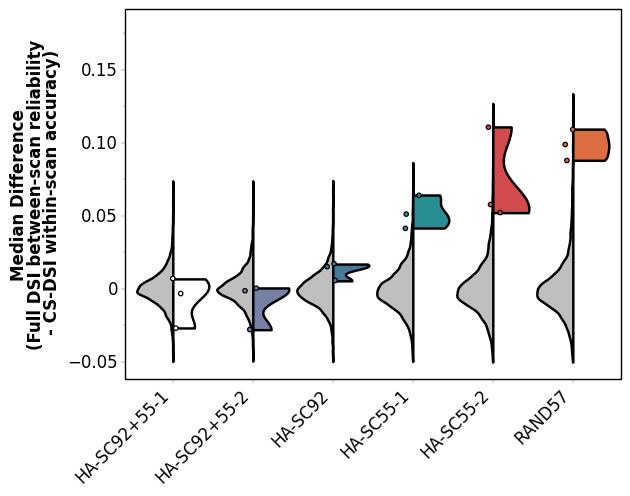

/cbica/projects/csdsi/miniconda3/envs/flywheel/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/cbica/projects/csdsi/miniconda3/envs/flywheel/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /cbica/projects/csdsi/cleaned_paper_analysis/figs/dice_violins/permutation_stats/retro_wthn_acc/all_tracks//all_subs.svg


/cbica/projects/csdsi/miniconda3/envs/flywheel/lib/python3.7/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_ydensity : Removed 97 rows containing non-finite values.
/cbica/projects/csdsi/miniconda3/envs/flywheel/lib/python3.7/site-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
/cbica/projects/csdsi/miniconda3/envs/flywheel/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/cbica/projects/csdsi/miniconda3/envs/flywheel/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /cbica/projects/csdsi/cleaned_paper_analysis/figs/dice_violins/permutation_stats/retro_wthn_acc/all_tracks//all_subs.png
/cbica/projects/csdsi/miniconda3/envs/flywheel/lib/python3.7/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_ydensity : Removed 97 rows containing non-finite values.
/cbica/projects/csdsi/miniconda3/envs/fl

In [31]:
get_violins("retro_wthn_acc", "all_tracks")